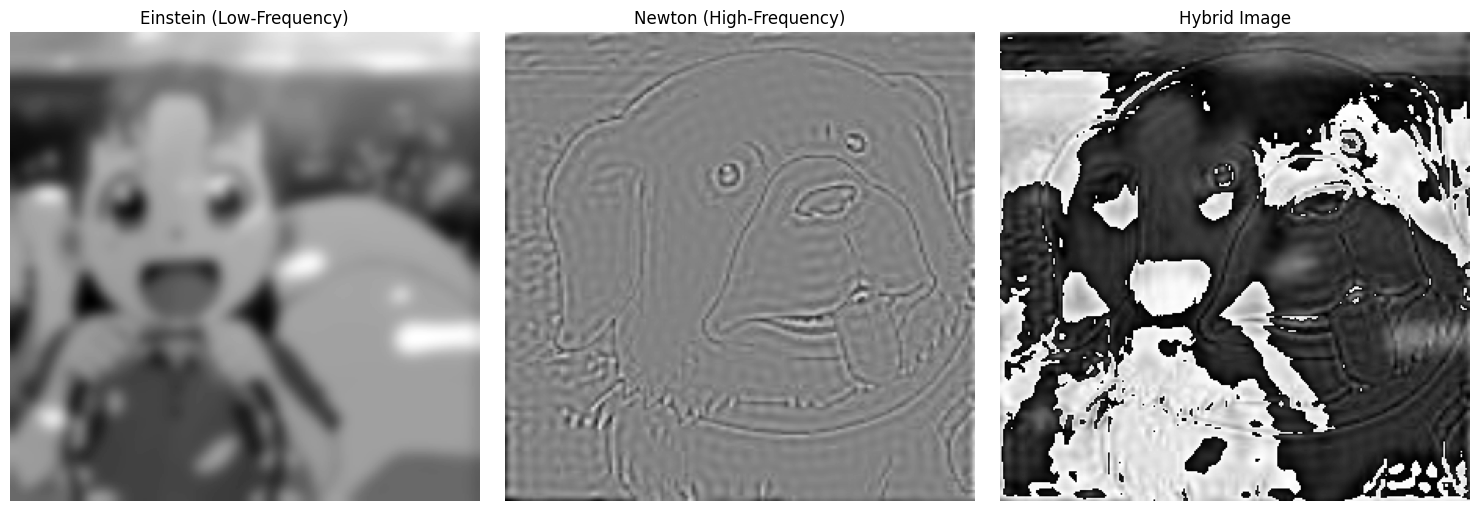

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
einstein_image = cv2.imread(r"C:\Users\Hp\Desktop\1.jpeg")
einstein_image = cv2.resize(einstein_image, (300, 300))
newton_image = cv2.imread("C:\Users\Hp\Desktop\2.jpeg")
newton_image = cv2.resize(newton_image, (300, 300))

# Convert the images to grayscale
einstein_gray = cv2.cvtColor(einstein_image, cv2.COLOR_BGR2GRAY)
newton_gray = cv2.cvtColor(newton_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to Einstein (low-pass filter)
einstein_low_pass = cv2.GaussianBlur(einstein_gray, (25, 25), 0)

# Perform 2D Fourier Transform on Newton image
fourier_transform = np.fft.fft2(newton_gray)

# Shift zero frequency components to the center
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Define the size of the high-pass filter kernel
kernel_size = 30  # Adjusted for better filtering

# Create a high-pass filter mask
rows, cols = newton_gray.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones((rows, cols), dtype=np.float32)
cv2.circle(mask, (center_col, center_row), kernel_size, 0, -1)

# Apply the mask to the Fourier Transform
filtered_fourier_transform = fourier_transform_shifted * mask

# Perform the inverse Fourier Transform to obtain the high-pass image
high_pass_image = np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)).real

# Normalize the high-pass image for display
high_pass_image = cv2.normalize(high_pass_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Create the hybrid image
hybrid_image = cv2.normalize(einstein_low_pass + high_pass_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the original images and the hybrid image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(einstein_low_pass, cmap='gray')
plt.title('Einstein (Low-Frequency)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('Newton (High-Frequency)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### Changes and Additions:

1. **Gaussian Blur for Low-Pass Filter**: The `cv2.GaussianBlur` function is used to create a low-pass filter effect on the Einstein image.
2. **High-Pass Filter Calculation**: Created a circular high-pass filter mask using `cv2.circle` and applied it to the Fourier-transformed Newton image.
3. **Normalization**: Used `cv2.normalize` to ensure the images are in the displayable range [0, 255] for better visualization.
4. **Display**: Added `plt.axis('off')` to remove axis labels for a cleaner look.


- Thori si help li thi ChatGpt se

# Q2

Text(0.5, 1.0, 'Mean Filter')

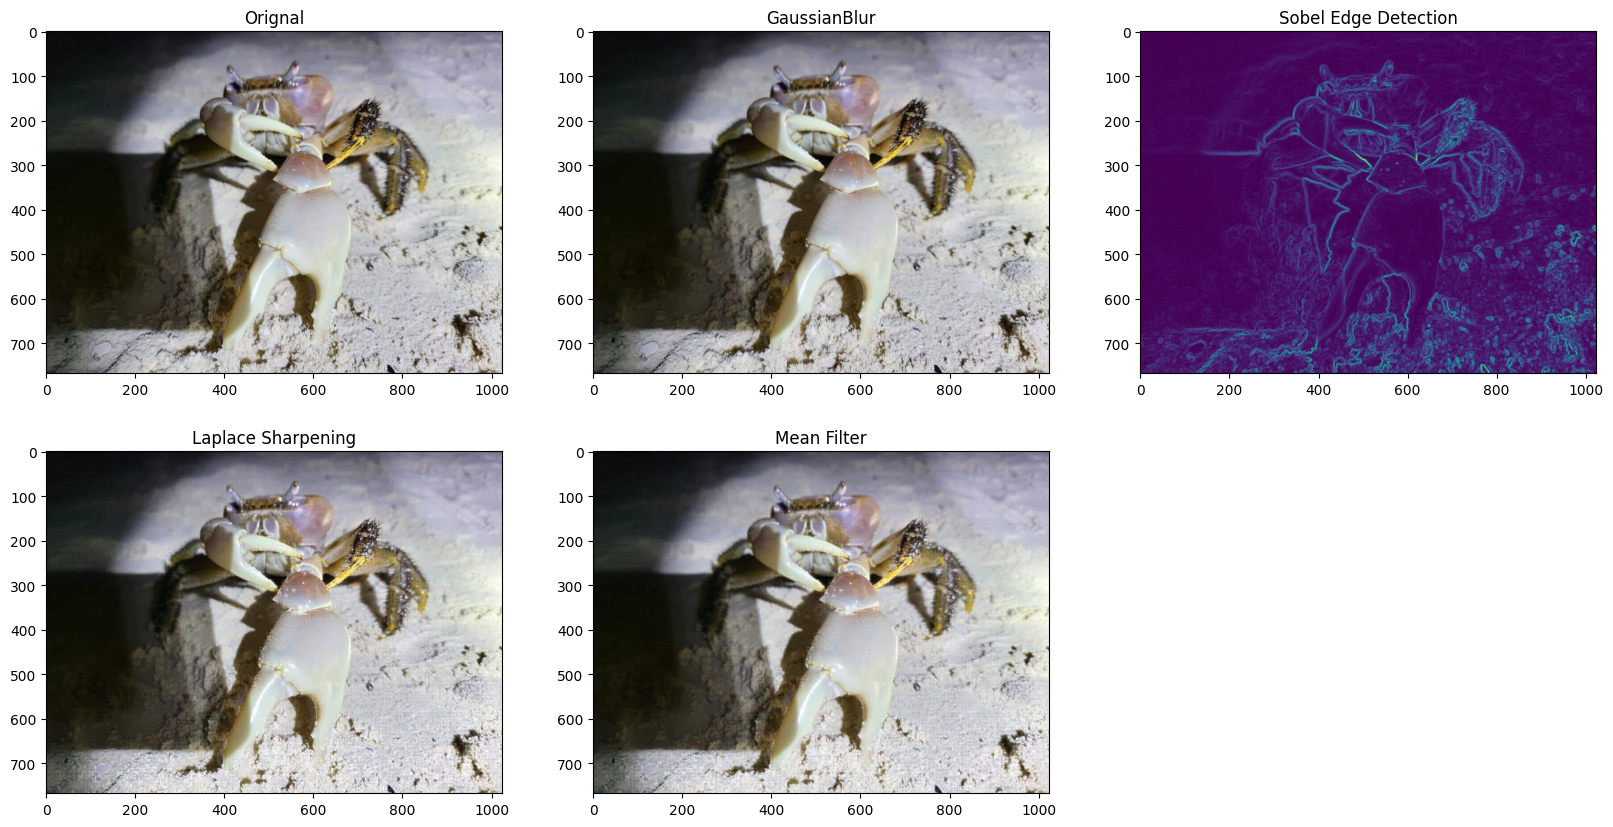

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\w2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Orignal')

#Gaussian 
sigma = 1.5
Gb_image = cv2.GaussianBlur(image, (1,1) , sigma)

plt.subplot(2, 3, 2)
plt.imshow(Gb_image)
plt.title('GaussianBlur')

#Sobel
gray_img = cv2.cvtColor(Gb_image , cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray_img , cv2.CV_64F , 1,0, ksize=5)
sobely = cv2.Sobel(gray_img , cv2.CV_64F , 0,1, ksize=5)

edge_image = cv2.magnitude(sobelx , sobely)

plt.subplot(2, 3, 3)
plt.imshow(edge_image)
plt.title('Sobel Edge Detection')

laplace = cv2.Laplacian(Gb_image , cv2.CV_64F)
laplace = cv2.convertScaleAbs(laplace) 
sharpened_image_laplacian = cv2.add(Gb_image,laplace)


plt.subplot(2, 3, 4)
plt.imshow(sharpened_image_laplacian)
plt.title('Laplace Sharpening')

mean = cv2.blur(sharpened_image_laplacian , (2,2))
plt.subplot(2, 3, 5)
plt.imshow(mean)
plt.title('Mean Filter')


Text(0.5, 1.0, 'Bi Filter')

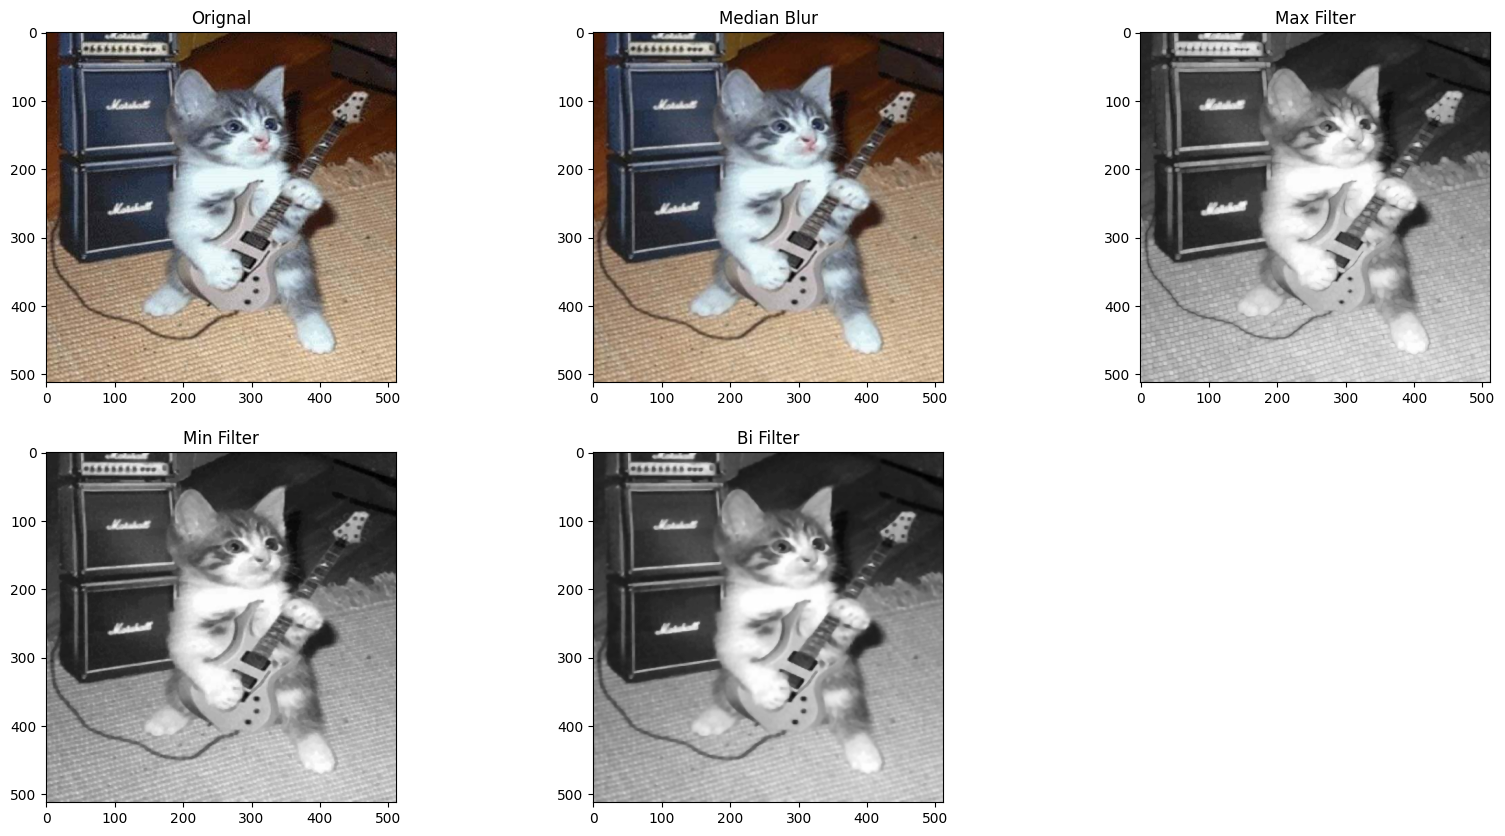

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\q3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Orignal')

medianBlur = cv2.medianBlur(image , 3)

plt.subplot(2, 3, 2)
plt.imshow(medianBlur)
plt.title('Median Blur')

gray_img = cv2.cvtColor(medianBlur , cv2.COLOR_RGB2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT , ksize=(3,3))
max_image = cv2.dilate(gray_img , kernel)

plt.subplot(2, 3, 3)
plt.imshow(max_image , cmap= 'gray')
plt.title('Max Filter')

minerode = cv2.erode(max_image , kernel)

plt.subplot(2, 3, 4)
plt.imshow(minerode, cmap= 'gray')
plt.title('Min Filter')

bi = cv2.bilateralFilter(minerode , d=5 , sigmaColor=25 , sigmaSpace=25)
plt.subplot(2, 3, 5)
plt.imshow(bi, cmap= 'gray')
plt.title('Bi Filter')


# Q3

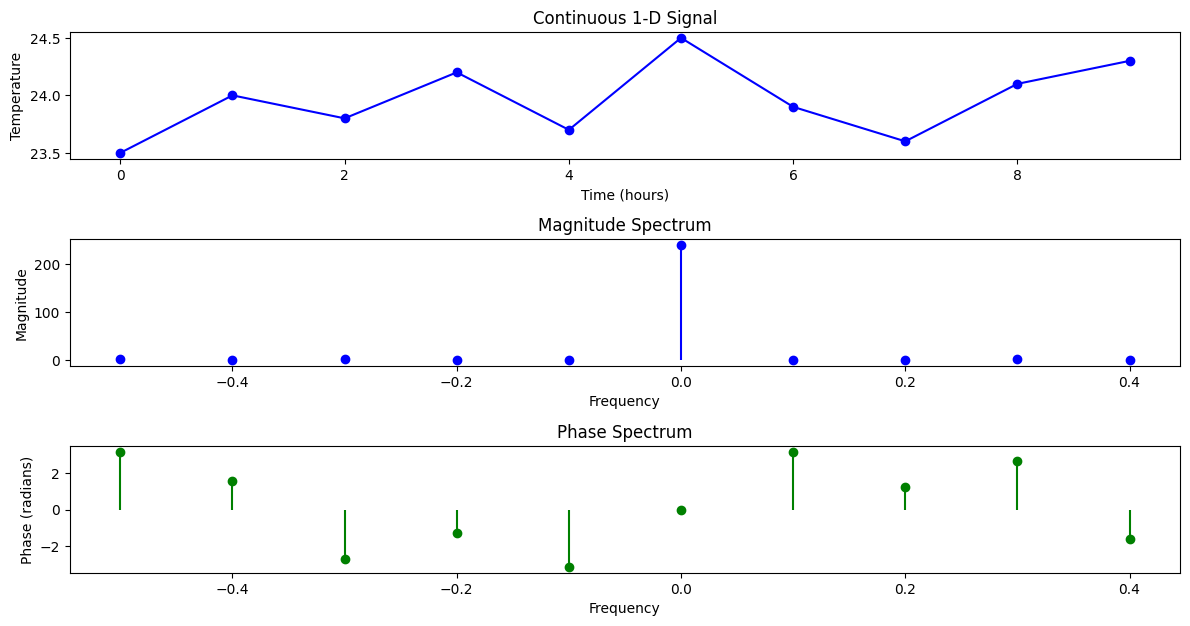

In [61]:
import numpy as np
import matplotlib.pyplot as plt

continuous_signal = np.array([23.5, 24.0, 23.8, 24.2, 23.7, 24.5, 23.9, 23.6, 24.1, 24.3])

sampled_indices = np.arange(0, len(continuous_signal))
sampled_signal = continuous_signal[sampled_indices]

time_axis = np.arange(0, len(continuous_signal))

fourier_transform = np.fft.fft(continuous_signal)

frequency_axis = np.fft.fftfreq(len(continuous_signal))

magnitude_spectrum = np.abs(fourier_transform)
phase_spectrum = np.angle(fourier_transform)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_axis, continuous_signal, marker='o', linestyle='-', color='b')
plt.title("Continuous 1-D Signal")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature")


plt.subplot(4, 1, 2)
plt.stem(frequency_axis, magnitude_spectrum, basefmt=" ", markerfmt="bo", linefmt="-b")
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(4, 1, 3)
plt.stem(frequency_axis, phase_spectrum, basefmt=" ", markerfmt="go", linefmt="-g")
plt.title("Phase Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()


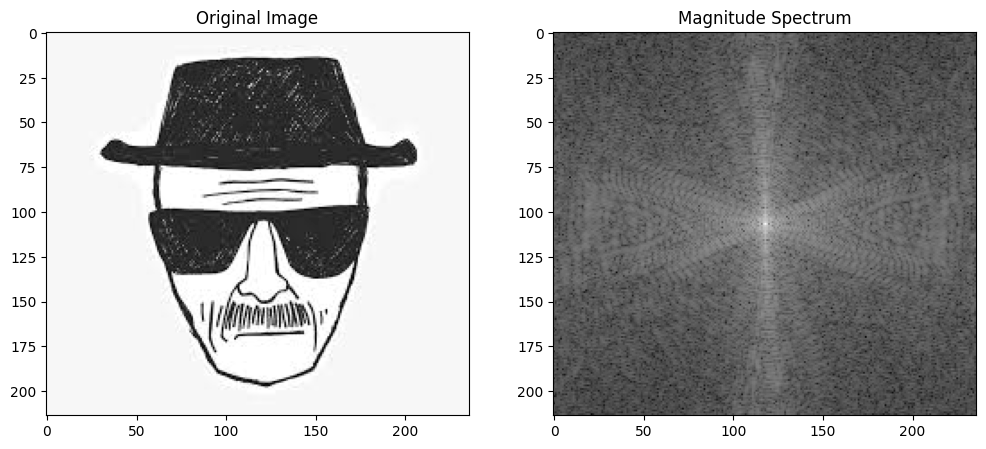

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\H.jpeg", cv2.IMREAD_GRAYSCALE)

f_transform = np.fft.fft2(image)

f_transform_shifted = np.fft.fftshift(f_transform)

magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.show()


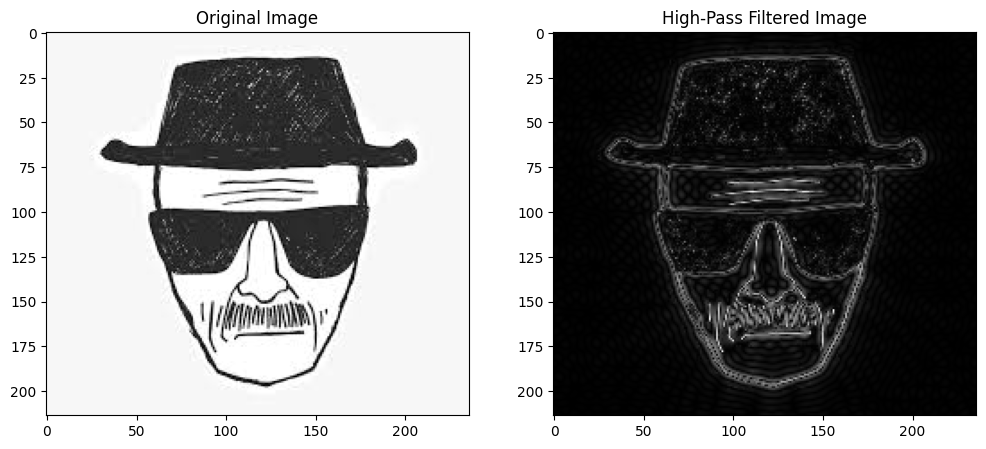

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
image = cv2.imread(r"C:\Users\Hp\Desktop\H.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply 2D Fourier Transform
f_transform = np.fft.fft2(image)

# Shift zero frequency components to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a high-pass filter mask
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a circular mask with a high-pass filter
radius = 30  # Radius of the low-frequency block area
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 0, -1)  # Set the center area to 0 (low frequencies blocked)

# Apply the mask to the Fourier transformed image
f_transform_filtered = f_transform_shifted * mask

# Inverse Fourier Transform to get the filtered image
f_ishift = np.fft.ifftshift(f_transform_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

# Display the original and high-pass filtered image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# High-pass filtered image
plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('High-Pass Filtered Image')

plt.show()


# Q4

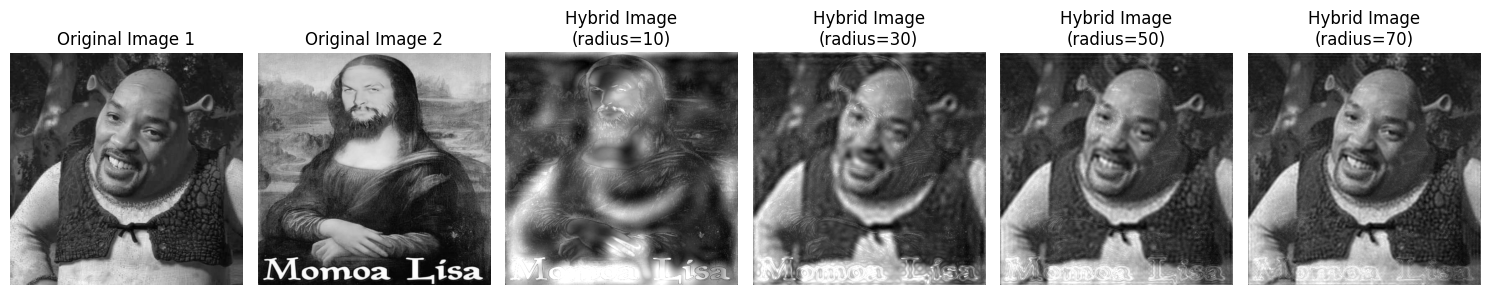

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_low_pass_filter(image, radius):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, -1)
    f_transform_filtered = f_transform_shifted * mask
    f_ishift = np.fft.ifftshift(f_transform_filtered)
    image_filtered = np.fft.ifft2(f_ishift)
    return np.abs(image_filtered)

def apply_high_pass_filter(image, radius):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, -1)
    f_transform_filtered = f_transform_shifted * mask
    f_ishift = np.fft.ifftshift(f_transform_filtered)
    image_filtered = np.fft.ifft2(f_ishift)
    return np.abs(image_filtered)

# Load and resize images
image1 = cv2.imread(r'C:\Users\Hp\Desktop\23.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(r'C:\Users\Hp\Desktop\22.jpg', cv2.IMREAD_GRAYSCALE)
image1 = cv2.resize(image1, (512, 512))
image2 = cv2.resize(image2, (512, 512))

# Define different radii for testing
radii = [10, 30, 50, 70]

plt.figure(figsize=(15, 15))

# Display original images
plt.subplot(2, len(radii) + 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, len(radii) + 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

# Generate and display hybrid images with different filter radii
for i, radius in enumerate(radii):
    # Apply filters with different radii
    low_pass_image = apply_low_pass_filter(image1, radius)
    high_pass_image = apply_high_pass_filter(image2, radius)
    
    # Combine images
    hybrid_image = low_pass_image + high_pass_image
    hybrid_image = np.clip(hybrid_image, 0, 255).astype(np.uint8)
    
    # Display the hybrid image
    plt.subplot(2, len(radii) + 2, i + 3)
    plt.imshow(hybrid_image, cmap='gray')
    plt.title(f'Hybrid Image\n(radius={radius})')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Analysis of Hybrid Images with Different Filter Radii

1. **Small Radius  10 pixels**:
   - **Low-Pass Filter**: The image is heavily blurred, with only the largest features retained.
   - **High-Pass Filter**: Emphasizes fine details and edges.
   - **Hybrid Image**: Displays sharp details up close but may lack smooth blending from a distance.

2. **Medium Radius 30 pixels**:
   - **Low-Pass Filter**: Smooths the image while preserving some mid-frequency details.
   - **High-Pass Filter**: Balances detail and texture emphasis.
   - **Hybrid Image**: Offers a more balanced integration of details, effective at both close and distant views.

3. **High Radius 50 pixels**:
   - **Low-Pass Filter**: Smooths the image significantly, retaining fewer details.
   - **High-Pass Filter**: Highlights edges but with less intensity.
   - **Hybrid Image**: Creates a smooth blend with noticeable visual effects from various distances.

4. **Very High Radius 70 pixels**:
   - **Low-Pass Filter**: Extremely blurred with minimal detail.
   - **High-Pass Filter**: Retains only the finest details.
   - **Hybrid Image**: Strong visual illusion, with a pronounced difference between close-up and distant views.

